In [1]:
import tensorflow as tf

import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
%matplotlib inline
rc('font', family='AppleGothic')

plt.rcParams['axes.unicode_minus'] = False

In [2]:
a = tf.range(6, dtype=tf.int32)      # [0, 1, 2, 3, 4, 5]
b = 2 * tf.ones(6, dtype=tf.int32)   # [2, 2, 2, 2, 2, 2]

tf.add(a,b)

<tf.Tensor: shape=(6,), dtype=int32, numpy=array([2, 3, 4, 5, 6, 7], dtype=int32)>

In [3]:
(a+b).numpy

<bound method _EagerTensorBase.numpy of <tf.Tensor: shape=(6,), dtype=int32, numpy=array([2, 3, 4, 5, 6, 7], dtype=int32)>>

In [4]:
w0 = tf.constant([[3.0], [5.0]])
w0.numpy()

array([[3.],
       [5.]], dtype=float32)

In [5]:
X = tf.concat([tf.ones((10, 1)), tf.random.normal((10, 1))], 1)
X.numpy()

array([[ 1.        ,  0.3710173 ],
       [ 1.        ,  3.4451303 ],
       [ 1.        , -1.5865557 ],
       [ 1.        ,  1.187078  ],
       [ 1.        ,  0.2283414 ],
       [ 1.        ,  1.8460734 ],
       [ 1.        , -2.4163837 ],
       [ 1.        ,  0.09256058],
       [ 1.        ,  0.43069106],
       [ 1.        , -0.7767415 ]], dtype=float32)

In [6]:
y_target = tf.matmul(X, w0) + tf.random.normal((10, 1))
y_target.numpy()

array([[ 3.3398714],
       [19.63544  ],
       [-5.709749 ],
       [ 8.293787 ],
       [ 6.2277956],
       [12.585548 ],
       [-9.652452 ],
       [ 4.3356805],
       [ 3.7912712],
       [-0.9479836]], dtype=float32)

In [10]:
w = tf.constant([[3.0], [5.0]])
y_predict = tf.matmul(X, w)
y_predict.numpy()

array([[ 4.8550863],
       [20.22565  ],
       [-4.9327784],
       [ 8.93539  ],
       [ 4.141707 ],
       [12.230367 ],
       [-9.081919 ],
       [ 3.462803 ],
       [ 5.1534553],
       [-0.8837075]], dtype=float32)

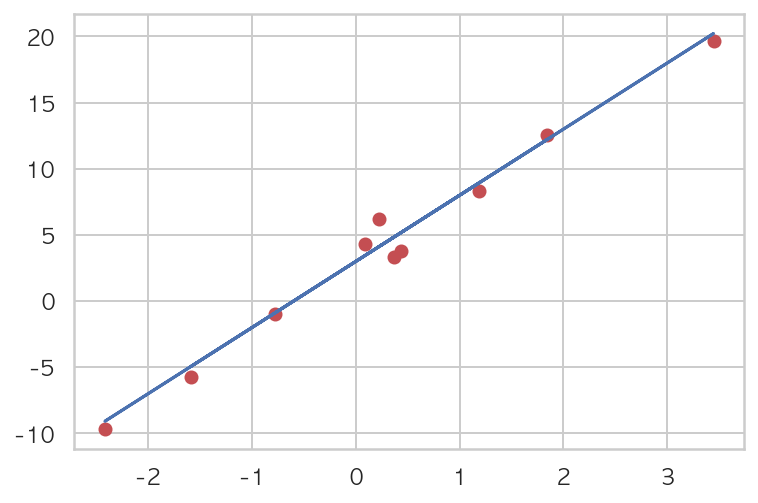

In [11]:
plt.plot(X[:, 1], y_target, "ro")
plt.plot(X[:, 1], y_predict, "b-")
plt.show()

In [12]:
loss = tf.reduce_sum(tf.square(y_target - y_predict))
loss.numpy()

11.084583

In [13]:
tf.linalg.inv

<function tensorflow.python.ops.gen_linalg_ops.matrix_inverse(input, adjoint=False, name=None)>

In [15]:
tf.matmul(tf.matmul(tf.linalg.inv(tf.matmul(tf.transpose(X),X)),tf.transpose(X)),y_target)

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[2.7731335],
       [5.021909 ]], dtype=float32)>

In [16]:
s = tf.Variable(1.0)

In [17]:
v = tf.Variable(tf.ones((2,)))

In [18]:
x = tf.Variable(tf.ones((2, 1)))

In [19]:
x.assign(tf.ones((2, 1)))
x.numpy()

array([[1.],
       [1.]], dtype=float32)

In [20]:
def f(x):
    return 5 * x

In [22]:
@tf.function
def g(a, b):
    return tf.matmul(a, b)

In [23]:
x = tf.Variable(tf.constant(1.0))

with tf.GradientTape() as tape:
    y = tf.multiply(5, x)

gradient = tape.gradient(y, x) 
gradient.numpy()

5.0

In [24]:
x1 = tf.Variable(tf.constant(1.0))
x2 = tf.Variable(tf.constant(1.0))

with tf.GradientTape() as tape:
    y = tf.multiply(x1, x2)

gradients = tape.gradient(y, [x1, x2]) 
gradients[0].numpy(), gradients[1].numpy()

(1.0, 1.0)

In [25]:
x = tf.Variable(tf.constant(1.0))
a = tf.constant(1.0)

with tf.GradientTape() as tape:
    y = tf.multiply(a, x)

gradient = tape.gradient(y, a) 
gradient is None

True

In [26]:
with tf.GradientTape() as tape:
    tape.watch(a)
    y = tf.multiply(a, x)

gradient = tape.gradient(y, a) 
gradient.numpy()

1.0

In [45]:
from tensorflow import keras

optimizer = keras.optimizers.SGD()

x = tf.constant(5.0)  # x = 5
w = tf.Variable(tf.constant(0.0))  # w의 초깃값
b = tf.Variable(tf.constant(1.0))


def train_step():
    with tf.GradientTape() as tape:
        y = tf.add(tf.multiply(x, w), b)
        loss = tf.square(tf.subtract(y, 50))

    variables = [w, b]
    gradients = tape.gradient(loss, variables)
    optimizer.apply_gradients(zip(gradients, variables))
    return loss

for i in range(15):
    loss = train_step()
    print("{:2}:w={:6.5f}, b={:6.5f}, loss={:10.5f}".format(i, w.numpy(), b.numpy(), loss.numpy()))

 0:w=4.90000, b=1.98000, loss=2401.00000
 1:w=7.25200, b=2.45040, loss= 553.19043
 2:w=8.38096, b=2.67619, loss= 127.45508
 3:w=8.92286, b=2.78457, loss=  29.36567
 4:w=9.18297, b=2.83659, loss=   6.76586
 5:w=9.30783, b=2.86157, loss=   1.55886
 6:w=9.36776, b=2.87355, loss=   0.35916
 7:w=9.39652, b=2.87930, loss=   0.08275
 8:w=9.41033, b=2.88207, loss=   0.01907
 9:w=9.41696, b=2.88339, loss=   0.00439
10:w=9.42014, b=2.88403, loss=   0.00101
11:w=9.42167, b=2.88433, loss=   0.00023
12:w=9.42240, b=2.88448, loss=   0.00005
13:w=9.42275, b=2.88455, loss=   0.00001
14:w=9.42292, b=2.88458, loss=   0.00000


In [51]:
# 가중치 변수
w = tf.Variable(tf.random.normal((2, 1)))

def model_predict(X):
    return tf.matmul(X, w)
    
def train_step(X, y_target):
    with tf.GradientTape() as tape:
        y_predict = model_predict(X)
        loss = tf.reduce_sum(tf.square(y_target - y_predict))

    gradient = tape.gradient(loss, w)
    optimizer.apply_gradients([(gradient, w)])
    return loss


# 정답인 가중치 벡터
w0 = tf.constant([[3.0], [5.0]])

# 입력 데이터 행렬
X = tf.concat([tf.ones((10, 1)), tf.random.normal((10, 1))], 1)

# 목표값 벡터
y_target = tf.matmul(X, w0) + tf.random.normal((10, 1))

losses = []
w_0s = []
w_1s = []
for i in range(20):
    loss_value = train_step(X, y_target)
    losses.append(loss_value)
    
    w_0 = w.numpy()[0][0]
    w_1 = w.numpy()[1][0]
    w_0s.append(w_0)
    w_1s.append(w_1)
    
    print(f"[{i:02d}] loss: {loss_value:7.3f}, w_0: {w_0:3.2f}, w_1: {w_1:3.2f}")

[00] loss: 290.680, w_0: -0.08, w_1: 0.35
[01] loss: 209.477, w_0: 0.07, w_1: 1.11
[02] loss: 154.746, w_0: 0.24, w_1: 1.72
[03] loss: 116.719, w_0: 0.43, w_1: 2.23
[04] loss:  89.620, w_0: 0.62, w_1: 2.65
[05] loss:  69.916, w_0: 0.81, w_1: 3.00
[06] loss:  55.371, w_0: 0.98, w_1: 3.29
[07] loss:  44.510, w_0: 1.14, w_1: 3.54
[08] loss:  36.336, w_0: 1.29, w_1: 3.75
[09] loss:  30.147, w_0: 1.42, w_1: 3.93
[10] loss:  25.443, w_0: 1.54, w_1: 4.09
[11] loss:  21.857, w_0: 1.65, w_1: 4.22
[12] loss:  19.119, w_0: 1.75, w_1: 4.33
[13] loss:  17.025, w_0: 1.84, w_1: 4.43
[14] loss:  15.422, w_0: 1.91, w_1: 4.51
[15] loss:  14.194, w_0: 1.98, w_1: 4.59
[16] loss:  13.253, w_0: 2.04, w_1: 4.65
[17] loss:  12.532, w_0: 2.09, w_1: 4.71
[18] loss:  11.979, w_0: 2.14, w_1: 4.76
[19] loss:  11.556, w_0: 2.18, w_1: 4.80


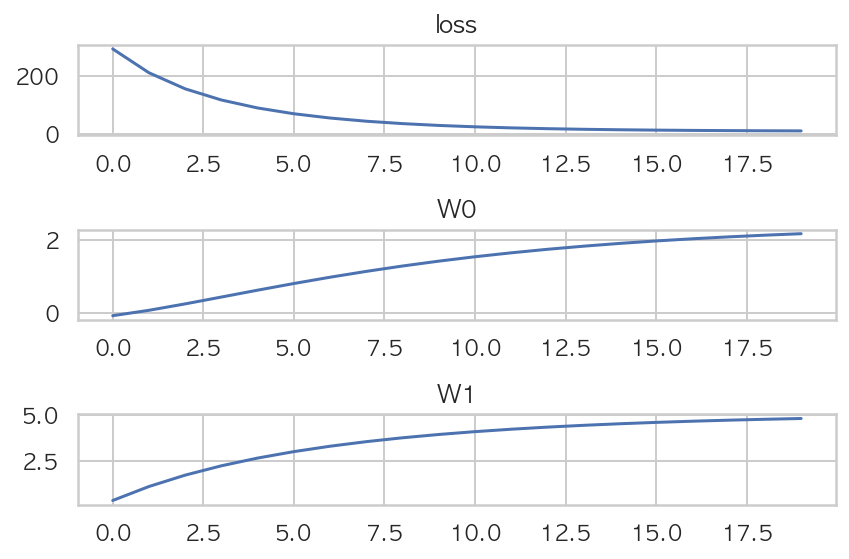

In [52]:
plt.subplot(311)
plt.plot(losses)
plt.title("loss")
plt.subplot(312)
plt.plot(w_0s)
plt.title("W0")
plt.subplot(313)
plt.plot(w_1s)
plt.title("W1")
plt.tight_layout()
plt.show()

[00000] loss: 299626.344
[10000] loss: 24514.988
[20000] loss: 22555.945
[30000] loss: 21518.232
[40000] loss: 20740.951
[50000] loss: 20077.875
[60000] loss: 19483.068
[70000] loss: 18939.609
[80000] loss: 18439.666
[90000] loss: 17978.490


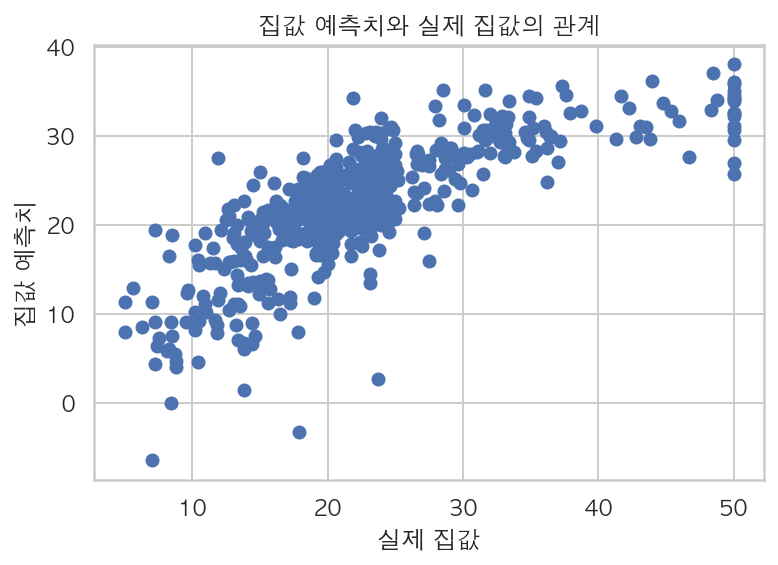

In [63]:
from sklearn.datasets import load_boston

boston = load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['const'] = np.ones(df.shape[0])
# 자료형을 float로 통일
X = tf.constant(df.values, dtype=tf.float32)
y_target = tf.constant(boston.target.reshape(-1, 1), dtype=tf.float32)

# 가중치 변수
w = tf.Variable(tf.zeros((X.shape[1], 1)))

@tf.function
def model_predict(X):
    return tf.matmul(X, w)

optimizer = keras.optimizers.SGD(learning_rate=6e-9)

@tf.function
def train_step(X, y_target):
    with tf.GradientTape() as tape:
        y_predict = model_predict(X)
        loss = tf.reduce_sum(tf.square(y_target - y_predict))

    gradient = tape.gradient(loss, w)
    optimizer.apply_gradients([(gradient, w)])
    return loss

for i in range(100000):
    loss_value = train_step(X, y_target)
    if (i % 10000 == 0):
        print(f"[{i:05d}] loss: {loss_value:2.3f}")

predictions = model_predict(X)
plt.scatter(boston.target, predictions)
plt.xlabel(u"실제 집값")
plt.ylabel(u"집값 예측치")
plt.title("집값 예측치와 실제 집값의 관계")
plt.show()

In [65]:
from tensorflow import keras
keras.__version__

'2.3.0-tf'

In [67]:
mnist = keras.datasets.mnist
(X_train0, y_train0), (X_test0, y_test0) = mnist.load_data()

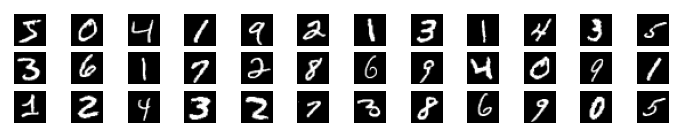

In [73]:
import matplotlib.pylab as plt

plt.figure(figsize=(6, 1))
for i in range(36):
    plt.subplot(3, 12, i+1)
    plt.imshow(X_train0[i], cmap="gray")
    plt.axis("off")
plt.show()

In [74]:
print(X_train0.shape, X_train0.dtype)
print(y_train0.shape, y_train0.dtype)
print(X_test0.shape, X_test0.dtype)
print(y_test0.shape, y_test0.dtype)

(60000, 28, 28) uint8
(60000,) uint8
(10000, 28, 28) uint8
(10000,) uint8


In [75]:
X_train = X_train0.reshape(60000, 784).astype('float32') / 255.0
X_test = X_test0.reshape(10000, 784).astype('float32') / 255.0
print(X_train.shape, X_train.dtype)

(60000, 784) float32


In [76]:
y_train0[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [77]:
from tensorflow.keras.utils import to_categorical

Y_train = to_categorical(y_train0, 10)
Y_test = to_categorical(y_test0, 10)
Y_train[:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [78]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

tf.random.set_seed(0)

model = Sequential()
model.add(Dense(15, input_dim=784, activation="sigmoid"))
model.add(Dense(10, activation="sigmoid"))
model.compile(optimizer=SGD(lr=0.2), loss='mean_squared_error', metrics=["accuracy"])